In [16]:
import os,sys

import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

from IPython.display import (Audio, display, clear_output)

## Load scan file

In [7]:
ismscan_all = np.genfromtxt('ismscan.csv', delimiter=',')

#First strip header information and only use relevant rows
max_rows = 150
ismscan = ismscan_all[:max_rows,6:]

#Reshape so array is properly ordered with each row representing a single time instant
#Calculate expected number of rows in final reshaped array (5 rows in CSV per sweep)
sweep_num = int(ismscan.shape[0] / 5)
num_freqbins = int(ismscan.shape[1]) * 5
ismscan = np.reshape(ismscan,(sweep_num, num_freqbins))
freq_binsize = 29940.12 #Hz
freq_array = np.linspace(2.4e6, 2.5e6, num_freqbins)

print(ismscan.shape)

(30, 3340)


## Plot sample sweep

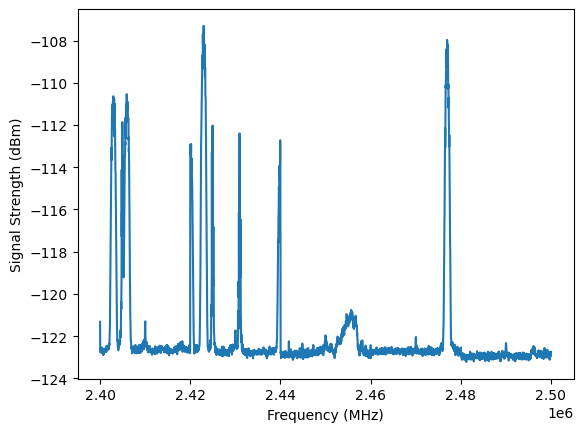

In [8]:
plt.plot(freq_array, ismscan[20,:])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Signal Strength (dBm)")
plt.show()

## Convert sweeps to sound by determining number of peaks

In [18]:
rate = 16000.
duration = 30
t = np.linspace(0., duration, int(rate * duration))
square_signal = np.zeros(len(t))

#Deterermine baseline and maximum power
baseline = np.median(ismscan[0:10, :])
max_power = np.max(ismscan[0:10, :])
peak_threshold = baseline + (max_power - baseline) / 20


#One scan per second
#Number of peaks per scan = number of hits per second

for sweep in range(sweep_num):
    peaks, _ = signal.find_peaks(ismscan[sweep,:], height = peak_threshold, distance = 250, prominence = 4)
    num_peaks = len(peaks)
    
    sweep_duration = 1
    sweep_t = np.linspace(0., sweep_duration, int(rate * sweep_duration))
    sweep_square_signal = signal.square(2 * np.pi * num_peaks * sweep_t) / 2 + 0.5
    #plt.plot(sweep_t, sweep_square_signal)
    #plt.show()
    
    start_index = int(sweep * rate)
    end_index = int((sweep + 1) * rate)
    square_signal[start_index:end_index] = sweep_square_signal

f = 220 #Hz 
sine_signal = np.sin(f * 2. * np.pi * t)

sound_signal = sine_signal * square_signal

In [19]:
display(Audio(sound_signal, rate=rate, autoplay=True))